Import directory

In [2]:
Dir_Main = r'D:\tasks\2025 Spring\AAE 625\AAE625_25\Week_1'

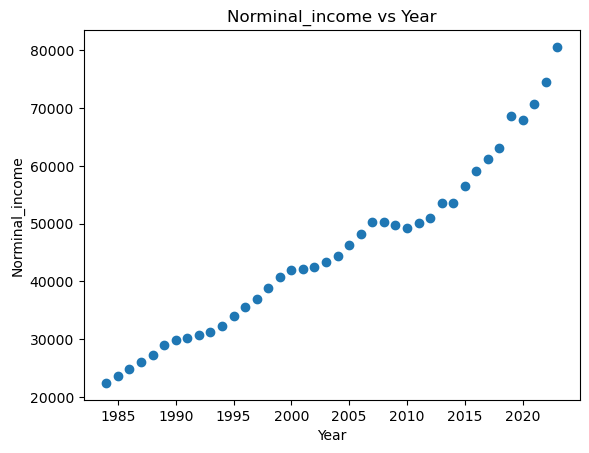

In [3]:
#import the MEHOINUSA646N.csv in the Dir_main
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(Dir_Main)
df_incom = pd.read_csv(Dir_Main + r'\MEHOINUSA646N.csv')
#change column names:observation_date:Date;MEHOINUSA646N:Norminal_income
df_incom.columns = ['Date', 'Norminal_income']
#change the Date to datetime type
df_incom['Date'] = pd.to_datetime(df_incom['Date'])
df_incom['Year'] = df_incom['Date'].dt.year
#create scatter plot:x-axis:Date;y-axis:Norminal_income
plt.scatter(df_incom['Date'], df_incom['Norminal_income'])
plt.xlabel('Year')
plt.ylabel('Norminal_income')
plt.title('Norminal_income vs Year')
plt.show()

Import the CPI data

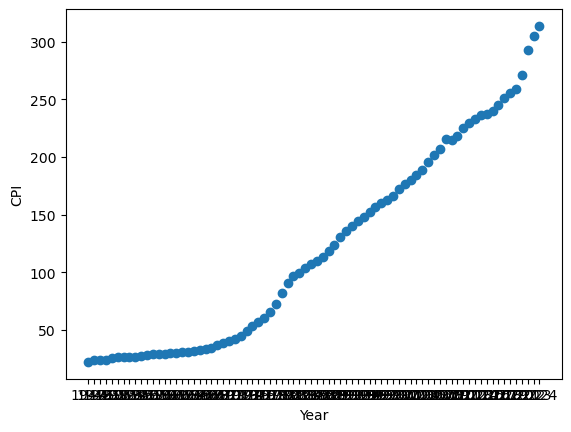

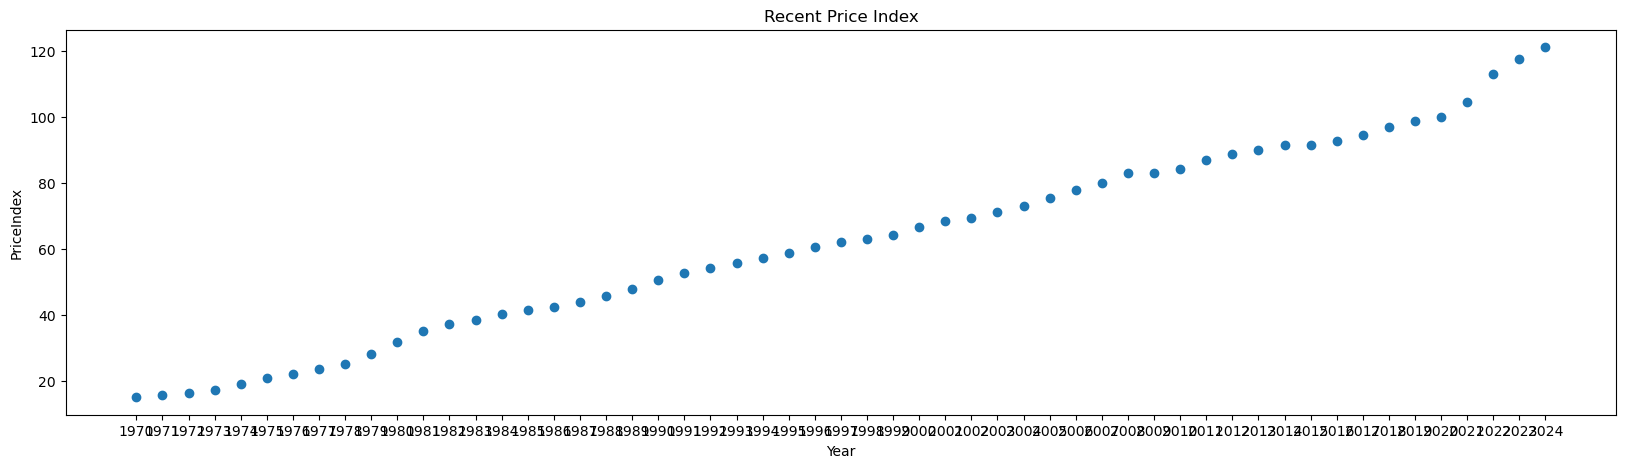

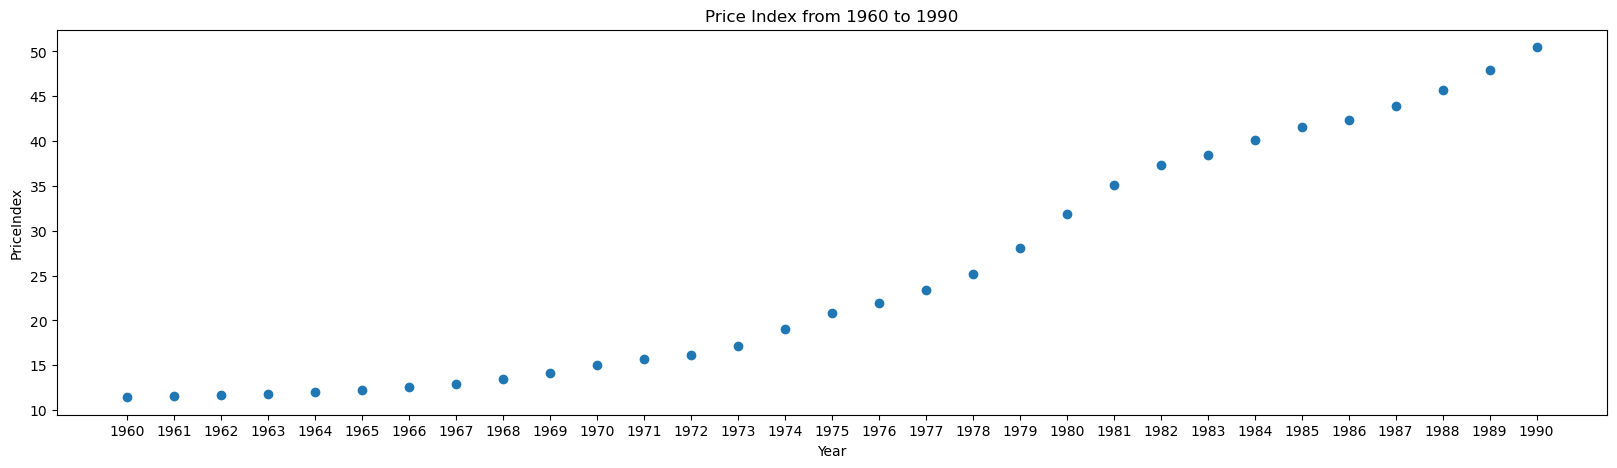

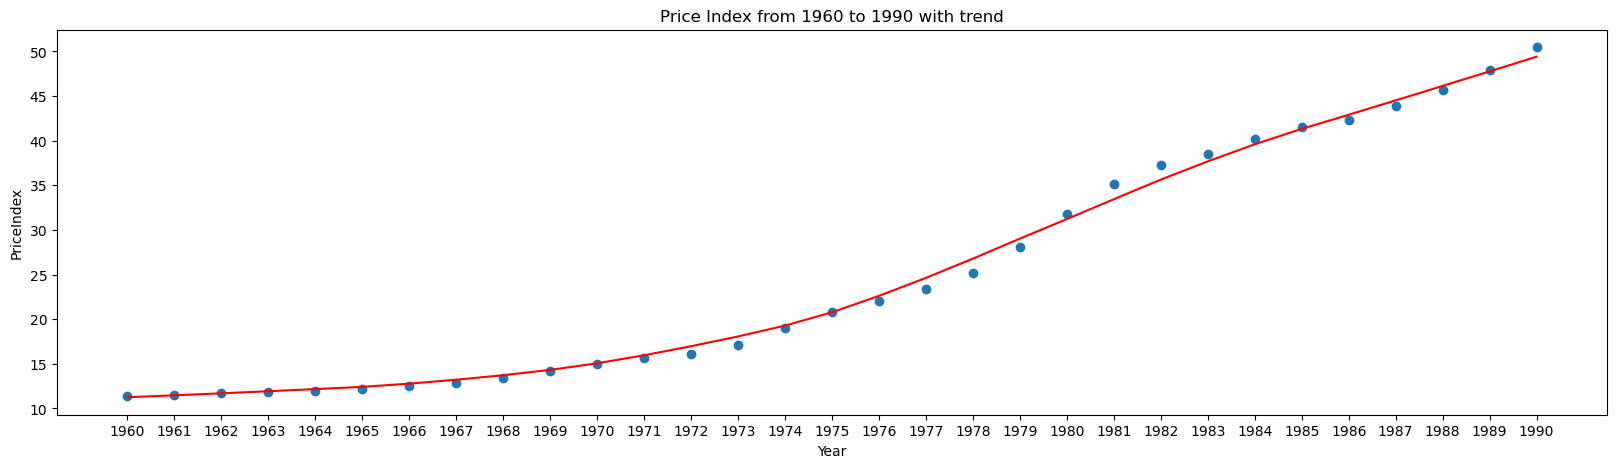

In [4]:
#cpi data saved in the Dir_main folder, named cpi_annual.csv
df_cpi = pd.read_csv(Dir_Main + r'\cpi_annual.csv')
#change column names:observation_date:Date;cpi:CPI
df_cpi.columns = ['Date', 'CPI']
df_cpi.head()
df_cpi['Year']=df_cpi['Date'].str[:4]

#creat a scatter plot:x-axis:Date;y-axis:CPI
plt.scatter(df_cpi['Year'], df_cpi['CPI'])
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()

# create the 'CPI_base2020' column in df_cpi:
#the value in the column is the CPI value in 2020
#CPI_base2020 = CPI in 2020
df_cpi['CPI_base2020'] = df_cpi['CPI'][df_cpi['Year']=='2020'].values[0]

# create the 'PriceIndex' column in df_cpi:
df_cpi['PriceIndex'] = df_cpi['CPI']/df_cpi['CPI_base2020']*100
df_cpi.head()

#change the size of the figure. It should be wider:
plt.figure(figsize = (20,5))
df_cpi_recent = df_cpi[df_cpi['Year']>='1970']
plt.scatter(df_cpi_recent['Year'], df_cpi_recent['PriceIndex'])
plt.xlabel('Year')
plt.ylabel('PriceIndex')
plt.title('Recent Price Index')
plt.show()

plt.figure(figsize = (20,5))
df_60_90 = df_cpi[(df_cpi['Year']>='1960') & (df_cpi['Year']<='1990')]
plt.scatter(df_60_90['Year'], df_60_90['PriceIndex'])
plt.xlabel('Year')
plt.ylabel('PriceIndex')
plt.title('Price Index from 1960 to 1990')
plt.show()

#add trend using lowess
from statsmodels.nonparametric.smoothers_lowess import lowess
df_60_90 = df_60_90.sort_values('Year')
loess_smoothed = lowess(df_60_90['PriceIndex'], df_60_90['Year'], frac=0.4)
plt.figure(figsize = (20,5))
plt.plot(df_60_90['Year'], loess_smoothed[:, 1], color='red')
plt.scatter(df_60_90['Year'], df_60_90['PriceIndex'])
plt.xlabel('Year')
plt.ylabel('PriceIndex')
plt.title('Price Index from 1960 to 1990 with trend')
plt.show()



Merge the two datasets

In [5]:
#ensure the 'Year' column in df_cpi is of integer type
df_cpi['Year'] = df_cpi['Year'].astype(int)
#merge df_incom with df_cpi on the 'Year' column
df_merge = pd.merge(df_incom, df_cpi, on='Year')
df_merge['Real_income'] = df_merge['Norminal_income']/df_merge['PriceIndex']*100
df_merge.tail()

,Date_x,Norminal_income,Year,Date_y,CPI,CPI_base2020,PriceIndex,Real_income
35,2019-01-01,68700,2019,2019-01-01,255.653,258.846,98.766448,69558.034523
36,2020-01-01,68010,2020,2020-01-01,258.846,258.846,100.000000,68010.000000
37,2021-01-01,70780,2021,2021-01-01,270.966,258.846,104.682321,67614.091362
38,2022-01-01,74580,2022,2022-01-01,292.621,258.846,113.048299,65971.802024
39,2023-01-01,80610,2023,2023-01-01,304.701,258.846,117.715167,68478.856518


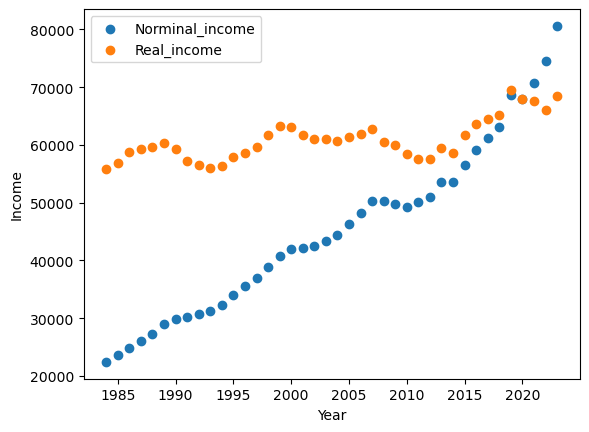

In [6]:
#scatter plot the real income and norminal income; the x-axis is the Year, the y-axis is the income
plt.scatter(df_merge['Year'], df_merge['Norminal_income'], label='Norminal_income')
plt.scatter(df_merge['Year'], df_merge['Real_income'], label='Real_income')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()
plt.show()

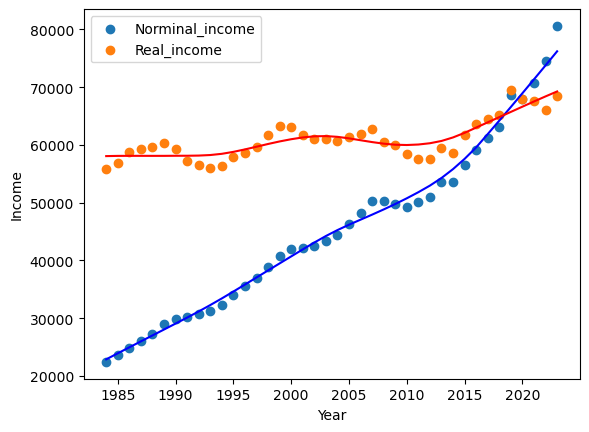

In [10]:
#scatter plot the real income and norminal income; the x-axis is the Year, the y-axis is the income；add trend using lowess base on the scatter
loess_smoothed = lowess(df_merge['Norminal_income'], df_merge['Year'], frac=0.4)
plt.plot(df_merge['Year'], loess_smoothed[:, 1], color='blue')  # plot the trend of Norminal_income
loess_smoothed = lowess(df_merge['Real_income'], df_merge['Year'], frac=0.4)                
plt.plot(df_merge['Year'], loess_smoothed[:, 1], color='red')  # plot the trend of Real_income
plt.scatter(df_merge['Year'], df_merge['Norminal_income'], label='Norminal_income')
plt.scatter(df_merge['Year'], df_merge['Real_income'], label='Real_income')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()
plt.show()


In [8]:
#perform the polynomial fit
z = np.polyfit(df_merge['Year'], df_merge['Norminal_income'], 1)
#Extract the slop and intercept
slope = z[0]
intercept = z[1]

print(f"Slope:{slope}")
print(f"Intercept:{intercept}")

Slope:1260.1632270168875
Intercept:-2479417.0253283344


In [9]:
#perform the polynomial fit
z_real = np.polyfit(df_merge['Year'], df_merge['Real_income'], 1)
#Extract the slop and intercept
slope_real = z_real[0]
intercept_real = z_real[1]

print(f"Slope:{slope_real}")
print(f"Intercept:{intercept_real}")

Slope:218.7408491727214
Intercept:-377296.8740645795
